In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import mnist_input
import numpy as np

In [3]:
data_set_dir = "mnist_data/"

TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'

In [4]:
local_file   = mnist_input.maybe_download(TRAIN_IMAGES, data_set_dir)
train_images = mnist_input.extract_images(local_file)

Extracting mnist_data/train-images-idx3-ubyte.gz


In [5]:
train_images.shape

(60000, 28, 28, 1)

In [6]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [7]:
train_images[0].squeeze().shape

(28, 28)

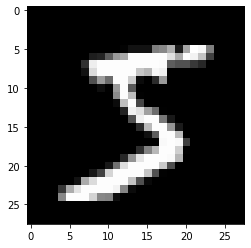

In [8]:
from matplotlib import pyplot as plt

plt.gray()
plt.imshow(train_images[0].squeeze(), interpolation='nearest')
plt.show()

In [9]:
merge_image = np.hstack([train_images[0], train_images[0]])
merge_image.shape

(28, 56, 1)

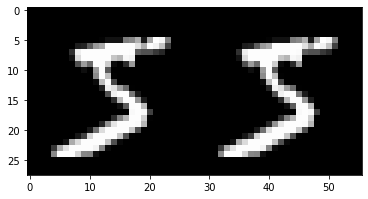

In [10]:
plt.imshow(merge_image.squeeze(), interpolation='nearest')
plt.show()

### The labels

In [11]:
one_hot = False

local_file = mnist_input.maybe_download(TRAIN_LABELS, data_set_dir)
train_labels = mnist_input.extract_labels(local_file, one_hot=one_hot)

Extracting mnist_data/train-labels-idx1-ubyte.gz


In [12]:
one_hot_labels = mnist_input.dense_to_one_hot(train_labels)
one_hot_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [13]:
one_hot_labels.shape

(60000, 10)

In [14]:
train_labels_one_hot = mnist_input.extract_labels(local_file, one_hot=True)

Extracting mnist_data/train-labels-idx1-ubyte.gz


In [15]:
train_labels_one_hot.shape

(60000, 10)

### Craft sum images + sum labels

In [16]:
sum_images = []
sum_labels = []

for i in range(0,500):
    for j in range(i, 500):
        _merge_image = np.hstack([train_images[i], train_images[j]])
        sum_images.append(_merge_image)
        sum_labels.append(train_labels[i] + train_labels[j])

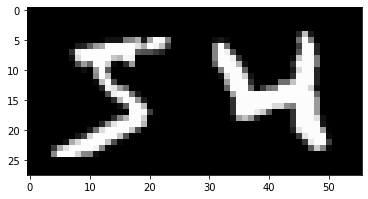

In [17]:
plt.imshow(sum_images[20].squeeze(), interpolation='nearest')
plt.show()

In [19]:
sum_labels[20]

9

### train_images final output format

In [20]:
train_images = np.asarray(sum_images)

In [21]:
train_images.shape

(125250, 28, 56, 1)

### train_label final output format
note: transform to one_hot encoding met nu 19 classes

In [22]:
train_labels = mnist_input.dense_to_one_hot(np.asarray(sum_labels), num_classes=19)

In [46]:
train_labels.shape

(125250, 19)

In [24]:
train_labels[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [48]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [32]:
#count amount of zero rows. should be zero
np.sum(~train_labels.any(1))

NameError: name 'train_labels' is not defined

### try new data set function and validate the data examples 

In [21]:
import mnist_input 
import numpy as np
data_set_dir = "mnist_data/"

amount_of_train_imgs = 1000

data_set_result = mnist_input.sum_read_data_sets(data_set_dir, n_labeled=amount_of_train_imgs)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
#### train size: 125250
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
#### test size: 1275
#### n_classes: 19


In [28]:
(images, labels) = data_set_result.train.next_batch(32)

In [23]:
images.shape

(32, 1568)

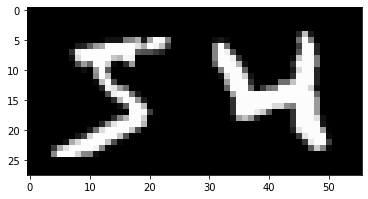

In [29]:
from matplotlib import pyplot as plt

plt.gray()
a_image = np.array(images[20]).reshape(28,56)
plt.imshow(a_image, interpolation='nearest')
plt.show()

In [30]:
labels[20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [31]:
np.sum(~labels.any(1))

16

In [27]:
l = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 1.])
y = np.array(np.arange(19)[l == 1][0])
y

array(18)